# Handwritten Digit Recognition Using AI (MNIST Dataset)
Created by David Redrovan
Course CAP4630

## Introduction

In this project, I built an AI system that can automatically recognize handwritten digits from images using the MNIST dataset.

**MNIST** stands for *Modified National Institute of Standards and Technology* dataset. It consists of 70,000 grayscale images of handwritten digits (0–9), each of size 28x28 pixels. It is a standard benchmark dataset used in machine learning and deep learning.

I will:

- Use the MNIST dataset as input.
- Train a **baseline neural network** for digit classification.
- Train a more advanced **Convolutional Neural Network (CNN)**.
- Compare the performance of the two models.
- Evaluate the system using accuracy and a confusion matrix.
- Analyze misclassified examples and discuss the results.


## Project Objectives

- **Problem:** Automatically recognizing handwritten digits is important for applications like digitizing forms, processing bank checks, and understanding handwritten data.

- **Goal:** Design and evaluate an AI model that classifies images of handwritten digits (0–9) from the MNIST dataset.

- **Specific Objectives:**
  - Load and explore the MNIST dataset.
  - Train a baseline fully connected neural network model for classification.
  - Train a Convolutional Neural Network (CNN) to improve performance.
  - Evaluate models using accuracy and confusion matrix.
  - Analyze common misclassifications and discuss potential improvements.



In [1]:
#Cell 3 - Imports and Setup 
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns 

In [2]:
#Cell 4 – Load the MNIST Dataset
# Load MNIST dataset from Keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("Training data shape:", x_train.shape, y_train.shape)
print("Test data shape:", x_test.shape, y_test.shape)


Training data shape: (60000, 28, 28) (60000,)
Test data shape: (10000, 28, 28) (10000,)


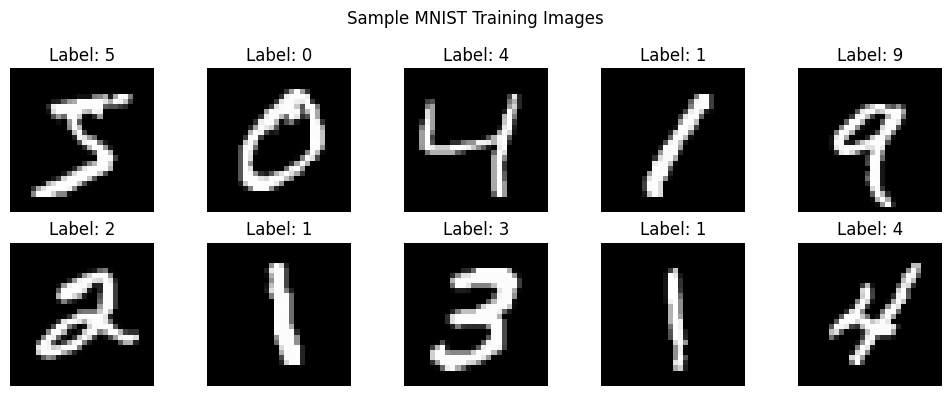

In [3]:
#Cell 5 – Visualize Sample Images
# Show a few sample images with labels
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.suptitle("Sample MNIST Training Images")
plt.tight_layout()
plt.show()


In [4]:
#Cell 6 – Preprocessing
# Normalize pixel values from [0, 255] to [0, 1]
x_train_norm = x_train.astype("float32") / 255.0
x_test_norm = x_test.astype("float32") / 255.0

# For the baseline model: flatten images to vectors of size 784
x_train_flat = x_train_norm.reshape(-1, 28 * 28)
x_test_flat = x_test_norm.reshape(-1, 28 * 28)

print("Flattened training shape:", x_train_flat.shape)
print("Flattened test shape:", x_test_flat.shape)

Flattened training shape: (60000, 784)
Flattened test shape: (10000, 784)


In [5]:
#Cell 7 – Baseline Model (Fully Connected NN) – Build & Train
# Build a simple fully connected baseline model
baseline_model = keras.Sequential(
    [
        layers.Input(shape=(28 * 28,)),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

baseline_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

baseline_model.summary()

# Train the baseline model
history_baseline = baseline_model.fit(
    x_train_flat,
    y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8924 - loss: 0.3901 - val_accuracy: 0.9547 - val_loss: 0.1721
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9498 - loss: 0.1767 - val_accuracy: 0.9665 - val_loss: 0.1261
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9632 - loss: 0.1279 - val_accuracy: 0.9698 - val_loss: 0.1079
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9717 - loss: 0.0988 - val_accuracy: 0.9735 - val_loss: 0.0934
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9772 - loss: 0.0800 - val_accuracy: 0.9730 - val_loss: 0.0907


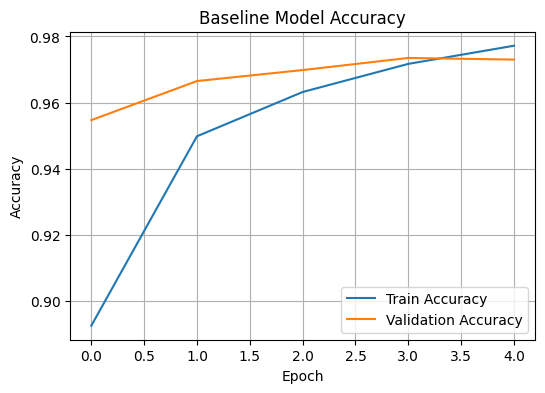

Baseline Model Test Accuracy: 0.9705


In [6]:
#Cell 8 – Baseline Model: Accuracy Plots & Test Performance
# Plot training and validation accuracy for baseline model
plt.figure(figsize=(6, 4))
plt.plot(history_baseline.history["accuracy"], label="Train Accuracy")
plt.plot(history_baseline.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Baseline Model Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Evaluate baseline model on test data
test_loss_baseline, test_acc_baseline = baseline_model.evaluate(x_test_flat, y_test, verbose=0)
print(f"Baseline Model Test Accuracy: {test_acc_baseline:.4f}")

In [7]:
#Cell 9 – Prepare Data for CNN
# Reshape data for CNN: (samples, height, width, channels)
x_train_cnn = x_train_norm.reshape(-1, 28, 28, 1)
x_test_cnn = x_test_norm.reshape(-1, 28, 28, 1)

print("CNN training shape:", x_train_cnn.shape)
print("CNN test shape:", x_test_cnn.shape)

CNN training shape: (60000, 28, 28, 1)
CNN test shape: (10000, 28, 28, 1)


In [8]:
#Cell 10 – CNN Model: Build & Train
# Build a simple CNN model
cnn_model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax"),
])

cnn_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

cnn_model.summary()

# Train the CNN model
history_cnn = cnn_model.fit(
    x_train_cnn,
    y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9214 - loss: 0.2609 - val_accuracy: 0.9795 - val_loss: 0.0703
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9794 - loss: 0.0677 - val_accuracy: 0.9842 - val_loss: 0.0583
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9858 - loss: 0.0470 - val_accuracy: 0.9882 - val_loss: 0.0402
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9884 - loss: 0.0374 - val_accuracy: 0.9892 - val_loss: 0.0387
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9909 - loss: 0.0300 - val_accuracy: 0.9895 - val_loss: 0.0393


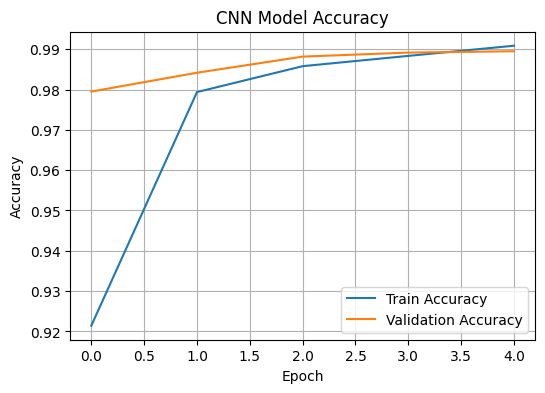

CNN Model Test Accuracy: 0.9891
Baseline Model Test Accuracy: 0.9705
Improvement (CNN - Baseline): 0.0186


In [9]:
#Cell 11 – CNN: Accuracy Plots & Test Performance
# Plot training and validation accuracy for CNN model
plt.figure(figsize=(6, 4))
plt.plot(history_cnn.history["accuracy"], label="Train Accuracy")
plt.plot(history_cnn.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("CNN Model Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Evaluate CNN model on test data
test_loss_cnn, test_acc_cnn = cnn_model.evaluate(x_test_cnn, y_test, verbose=0)
print(f"CNN Model Test Accuracy: {test_acc_cnn:.4f}")

print(f"Baseline Model Test Accuracy: {test_acc_baseline:.4f}")
print(f"Improvement (CNN - Baseline): {test_acc_cnn - test_acc_baseline:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


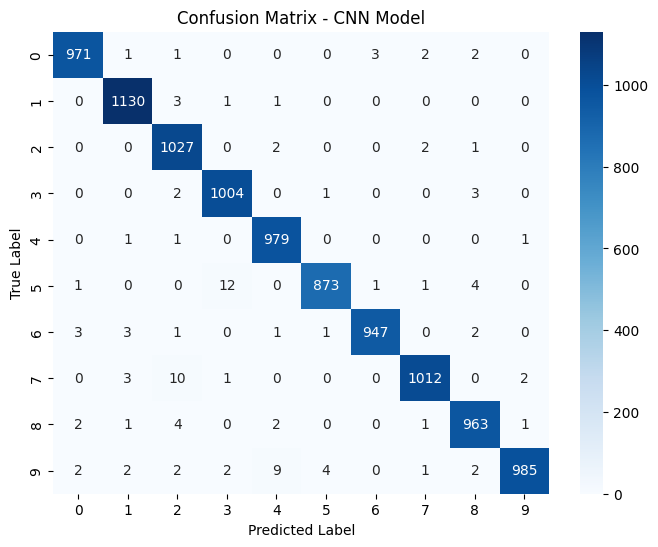

In [10]:
#Cell 12 – Confusion Matrix for CNN
# Predict classes for test set
y_pred_probs = cnn_model.predict(x_test_cnn)
y_pred = np.argmax(y_pred_probs, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - CNN Model")
plt.show()


Number of misclassified examples: 109


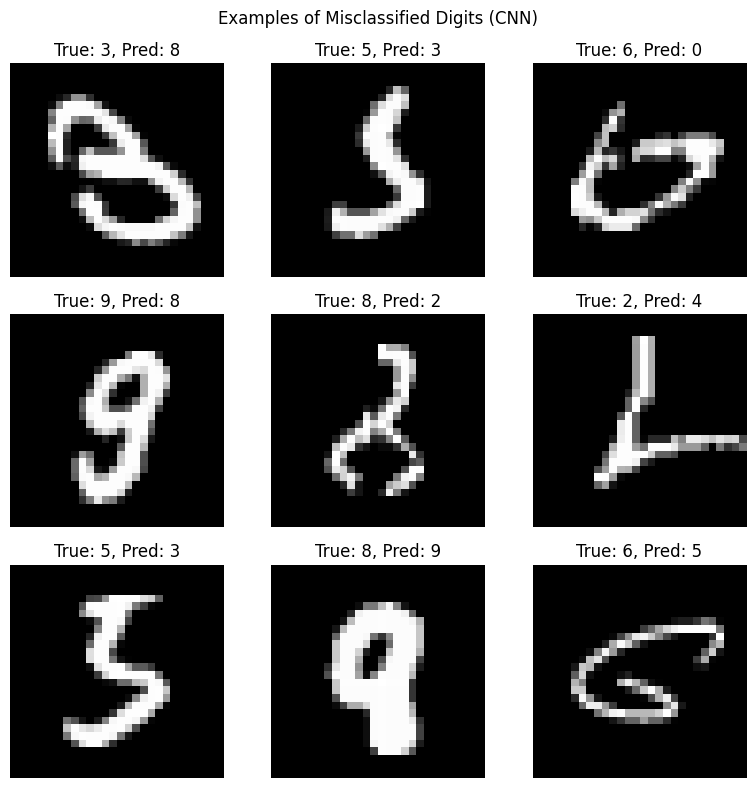

In [11]:
#Cell 13 – Show Misclassified Examples
# Find indices of misclassified examples
misclassified_indices = np.where(y_pred != y_test)[0]

print("Number of misclassified examples:", len(misclassified_indices))

# Show some misclassified images
num_to_show = 9
plt.figure(figsize=(8, 8))
for i, idx in enumerate(misclassified_indices[:num_to_show]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[idx], cmap="gray")
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
    plt.axis("off")
plt.suptitle("Examples of Misclassified Digits (CNN)")
plt.tight_layout()
plt.show()


In [12]:
#Cell 14 – Classification Report
print("Classification Report (CNN Model):")
print(classification_report(y_test, y_pred))


Classification Report (CNN Model):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Cell 15 – Discussion & Conclusion
## Discussion and Conclusion

### Model Comparison

- **Baseline Model (Fully Connected Neural Network):**
  - Test accuracy: 0.97
  - Uses flattened pixel values as input.
  - Simpler architecture but does not fully exploit spatial structure in images.

- **CNN Model:**
  - Test accuracy: 0.99
  - Uses convolution and pooling layers to capture spatial patterns.
  - Performs better than the baseline model on the MNIST dataset.

### Key Observations

- The CNN model achieved higher accuracy than the baseline neural network, showing that convolutional layers are more effective for image data.
- The confusion matrix shows that most digits are classified correctly, but the model sometimes confuses similar-looking digits such as 4 and 9 or 3 and 5.
- Misclassified examples often involve digits that are written in an unusual style or are ambiguous even to humans.

### Limitations and Future Work

- The model is trained only on MNIST, which consists of clean, centered, grayscale digit images. Real-world handwritten digits (e.g., on forms or checks) may be noisier or more varied.
- Future improvements could include:
  - Data augmentation to simulate real-world variations.
  - Trying deeper CNN architectures.
  - Extending the model to recognize letters or full handwritten words.

### What We Learned

- How to load and preprocess image data for machine learning.
- The difference between a basic fully connected model and a CNN.
- How convolution and pooling operations improve performance on image tasks.
- How to evaluate models using accuracy, confusion matrix, and misclassified examples.
